<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Walmart%20CI%20%26%20CLT%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

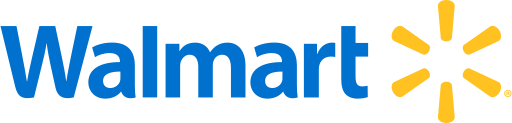

# **Business Problem**

Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

* Analyze spending habits difference between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

* Perform the same activity for Married vs Unmarried and Age

* Finally calculate confidence intervals for each analysis

* Give Bussiness Insights & Recommendations to make changes or improvements

# **Desired Outcome of Analysis**

* Average spend based on Gender, Age, Marital status and other paramaeters
* Find Population mean, 90%,95%,99% Confidence intervals using Centre Limit Theorem  for all above paramters








# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

# "dataC" - This will be used for changing some Numerical to Categorical,
# Whereas "data" will be used for Correlation, scatterplot & whereever indepth analysis required

We will Group the Data by ["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"] and sum the Purchase values to check for Customer Wise data

In [3]:
dataC = data.groupby(["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status"])["Purchase"].aggregate([sum,np.mean]).reset_index()

In [4]:
dataC.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,sum,mean
0,1000001,F,0-17,10,A,2,0,334093,9545.514286
1,1000002,M,55+,16,C,4+,0,810472,10525.610390
2,1000003,M,26-35,15,A,3,0,341635,11780.517241
3,1000004,M,46-50,7,B,2,1,206468,14747.714286
4,1000005,M,26-35,20,A,1,1,821001,7745.292453


Bussiness problem's need to check purchase behaviour based on category like Age, Gender, Marital Status ; so we will consider each transaction as it is without relating it to any User ID

# **Basic Metric Analysis**

In [ ]:
data.shape

(550068, 10)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=550068, step=1)

In [ ]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# Checking Value Count of Each Category
for i in data.columns:
  print(i, "Nunique values :", data[i].nunique(),", Max :", data[i].max(),", Min :",data[i].min())
  print("------------------------------------------------------------------------------------------------")

User_ID Nunique values : 5891 , Max : 1006040 , Min : 1000001
------------------------------------------------------------------------------------------------
Product_ID Nunique values : 3631 , Max : P0099942 , Min : P00000142
------------------------------------------------------------------------------------------------
Gender Nunique values : 2 , Max : M , Min : F
------------------------------------------------------------------------------------------------
Age Nunique values : 7 , Max : 55+ , Min : 0-17
------------------------------------------------------------------------------------------------
Occupation Nunique values : 21 , Max : 20 , Min : 0
------------------------------------------------------------------------------------------------
City_Category Nunique values : 3 , Max : C , Min : A
------------------------------------------------------------------------------------------------
Stay_In_Current_City_Years Nunique values : 5 , Max : 4+ , Min : 0
----------------------

In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
data.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
for i in data.columns:
  print(data[i].value_counts())
  print("-------------------------------------")

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
-------------------------------------
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
-------------------------------------
M    414259
F    135809
Name: Gender, dtype: int64
-------------------------------------
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
-------------------------------------
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8

* There are 5891 unique customers from
* Customer are of both M & F gender
* There are customers from 7 different age groups
* Customer are from 21 Different Occupations
* Customers comprise of both mariied & Singles
* Customer comprise of all 3 City Categories
* Customer Stay in Current City varies from 0 to 4+ Years
* Customer Purchase value varies from 12 ~ 23961 $

# **Data Cleaning - Duplicates,Null Values & Outliers**

## Duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace= True)

No Duplicates Rows Found

## Null Values

In [ ]:
data.isna().sum(axis=0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No "NAN" found in Data

## Outliers - Visualization using Box Plot

* Outliers can be found in Purchase value with Respect to Age, Gender, Marital Status & other Features
* We will visualize the outliers using boxplot
* We will drop the outliers in the later section, when we find the Confidence interval for each category individually

<Axes: xlabel='Age', ylabel='Purchase'>

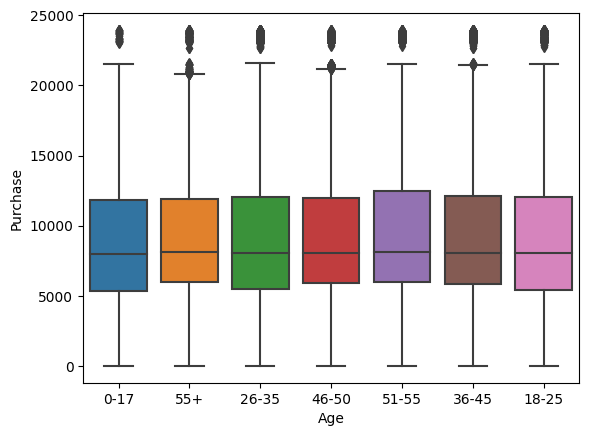

In [ ]:
sns.boxplot(data= data, x= "Age", y= "Purchase")

* Purchase value Median of Age group is almost same

<Axes: xlabel='Gender', ylabel='Purchase'>

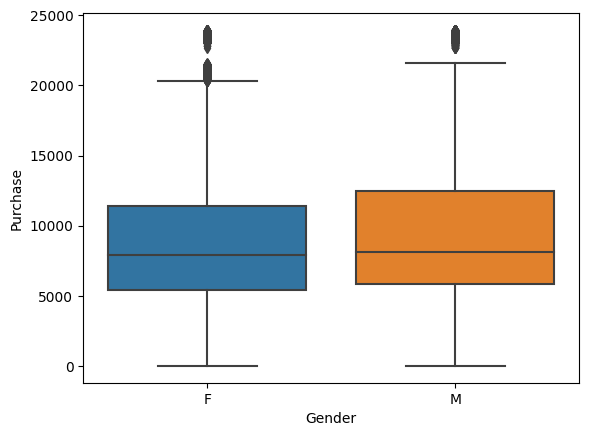

In [ ]:
sns.boxplot(data= data, x= "Gender", y= "Purchase")

* Median of Male gender is slightly higher than Female gender

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

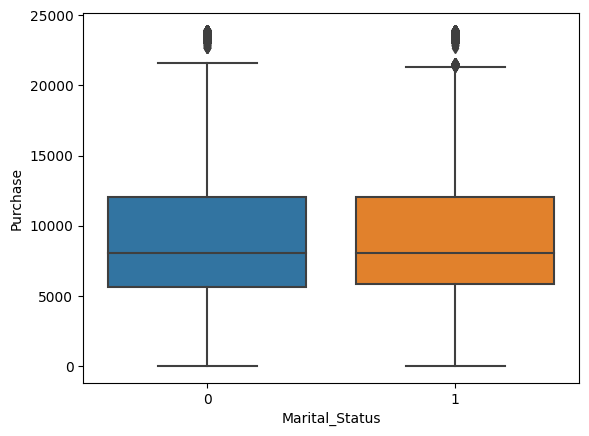

In [ ]:
sns.boxplot(data= data, x= "Marital_Status", y= "Purchase")

* Median of Married & Singles is almost same

## Outliers - Using IQR Analysis

In [ ]:
# Finding outlier for all Purchase in Totality
print("Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit")
x ="Purchase"
IQR = np.percentile(data[x],75) - np.percentile(data[x],25)
lower_limit = max (np.percentile(data[x],25) - 1.5*IQR,0)
upper_limit = np.percentile(data[x],75) + 1.5*IQR
droplist.extend(list(np.where( (data[x]>upper_limit) | (data[x]<lower_limit) )[0]))
print(x,":", IQR,",",lower_limit,",",np.percentile(data[x],25),",",np.percentile(data[x],75),",",upper_limit)


Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
Purchase : 6231.0 , 0 , 5823.0 , 12054.0 , 21400.5


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
data["Gender"].value_counts().index[1]

'F'

In [ ]:
# Finding outlier for Purchase values for each feature and its values
x ="Purchase"
for z in ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']:
  for y in data[z].value_counts().index:
    outlierlist=[]
    datai = data[data[z] == y]
    print(z,"-", y,"Category")
    print("*******************************************************************")
    IQR = np.percentile(datai[x],75) - np.percentile(datai[x],25)
    lower_limit = max (np.percentile(datai[x],25) - 1.5*IQR,0)
    upper_limit = np.percentile(datai[x],75) + 1.5*IQR
    outlierlist.extend(list(np.where( (datai[x]>upper_limit) | (datai[x]<lower_limit) )[0]))
    print("IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit")
    print( IQR,",",lower_limit,",",np.percentile(datai[x],25),",",np.percentile(datai[x],75),",",upper_limit)
    print()
    print("Out of ",len(datai), "Data points , There are",len(outlierlist),"Outliers")
    print()
    print("*******************************************************************")




Gender - M Category
*******************************************************************
IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
6591.0 , 0 , 5863.0 , 12454.0 , 22340.5

Out of  414259 Data points , There are 1812 Outliers

*******************************************************************
Gender - F Category
*******************************************************************
IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
5967.0 , 0 , 5433.0 , 11400.0 , 20350.5

Out of  135809 Data points , There are 2065 Outliers

*******************************************************************
Age - 26-35 Category
*******************************************************************
IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
6572.0 , 0 , 5475.0 , 12047.0 , 21905.0

Out of  219587 Data points , There are 816 Outliers

*******************************************************************
Age - 36-45 Category
****************************************************************

Outliers have been identified for all the required Categories

# **Correlation among Data**

In [ ]:
data.corr()

<ipython-input-119-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<ipython-input-120-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


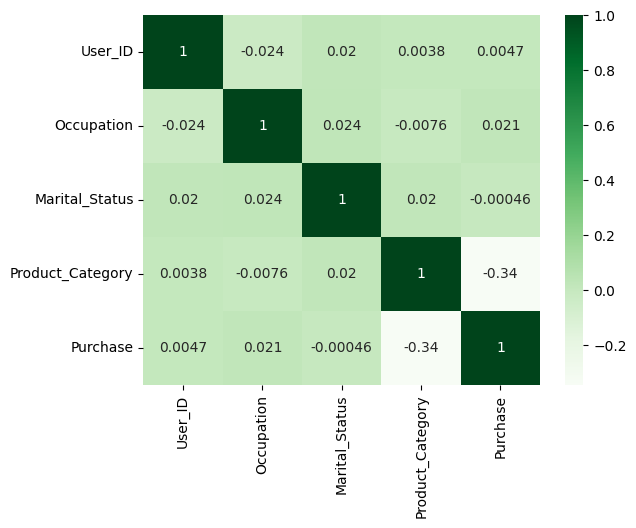

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

All Numeric Features are least Correlated

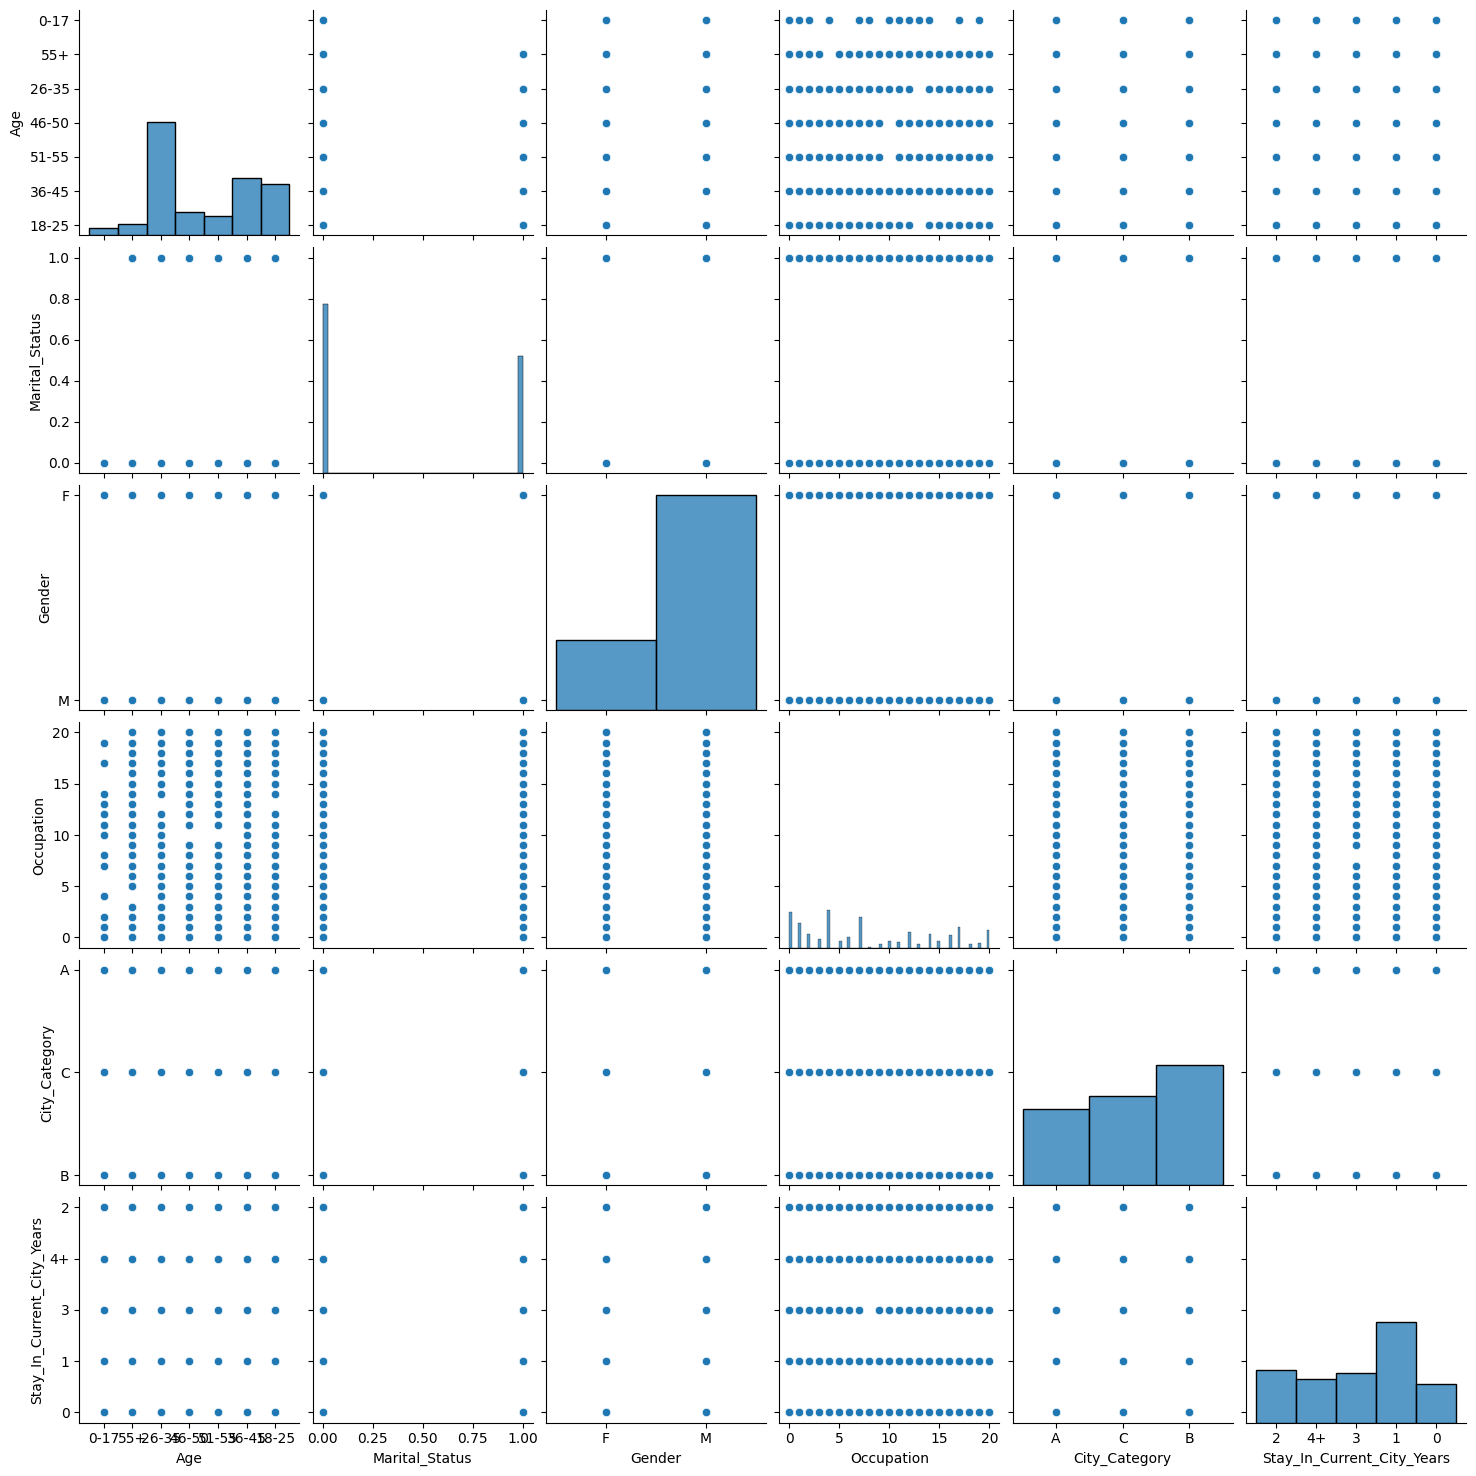

In [ ]:
sns.pairplot(data,vars =["Age","Marital_Status","Gender","Occupation","City_Category","Stay_In_Current_City_Years"] )


* Majority of Purchase made by customers Stay_in Current_City is 1 Year
* Majority of Purchase made by customers from B Category City
* Majority of Purchase made by customers of Occupation "4"
* Majority of Purchase made by customers of Male Gender
* Majority of Purchase made by customers are of Singles
* Majority of Purchase made by customers of Age group "26-35"


# **UniVariate, Bivariate Analysis**

In [ ]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

## Gender

In [ ]:
data["Gender"].value_counts(normalize = True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

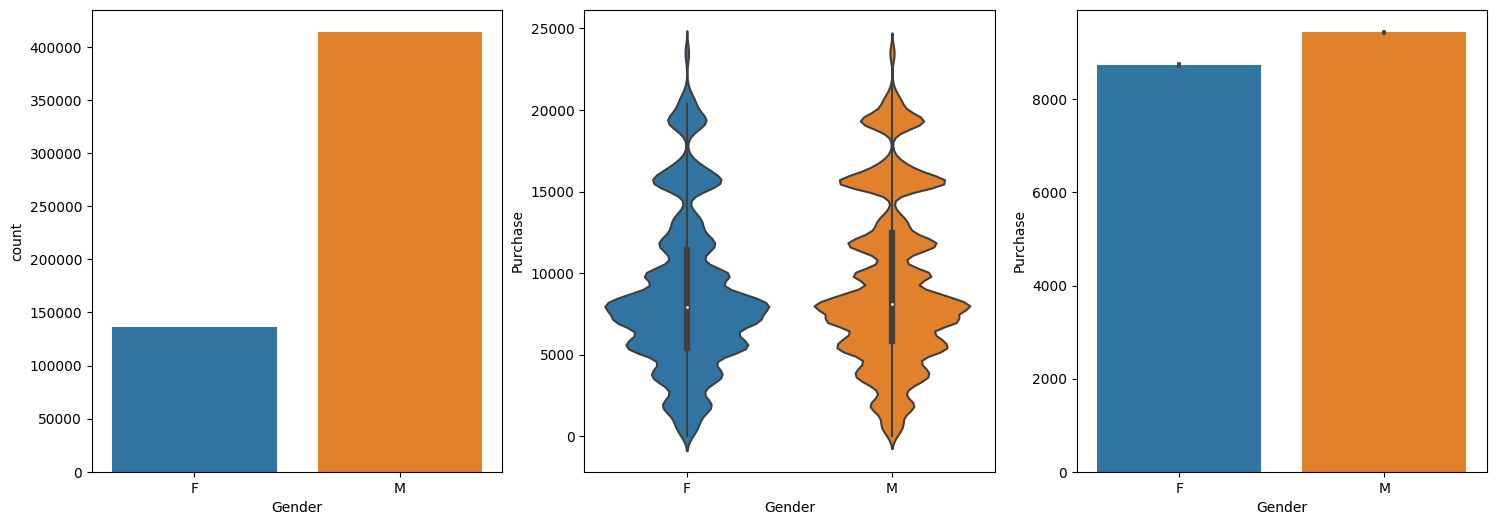

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.countplot(data=data,x="Gender")
plt.subplot(1,3,2)
sns.violinplot(data=data,y="Purchase",x = "Gender")
plt.subplot(1,3,3)
sns.barplot(data=data,y="Purchase",x = "Gender", estimator = "mean")
plt.show

* 75% of purchased are made by Male Customers
* Avg Purchase value of male Customers is more than Female Customers


## Age

In [ ]:
data["Age"].value_counts(normalize = True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

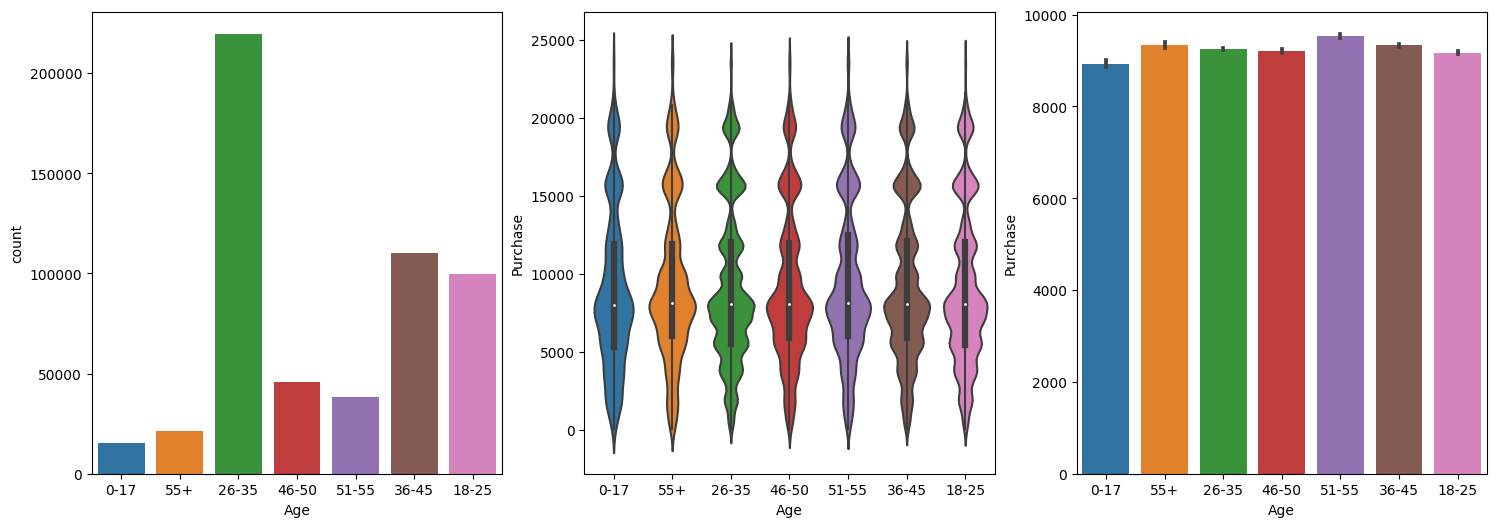

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.countplot(data=data,x="Age")
plt.subplot(1,3,2)
sns.violinplot(data=data,y="Purchase",x = "Age")
plt.subplot(1,3,3)
sns.barplot(data=data,y="Purchase",x = "Age", estimator = "mean")
plt.show

* 40% Purchases of customer are of age group 26-35
* 20% Purchases of cutomers are of age group 36-45
* 18% Purchases of cutomers are of age group 18-25

* Avg Purchase values is Highest for Age group = 51-55
* Avg Purchase values is least for age Group = 0-17

## Marital_Status

In [ ]:
data["Marital_Status"].value_counts(normalize = True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

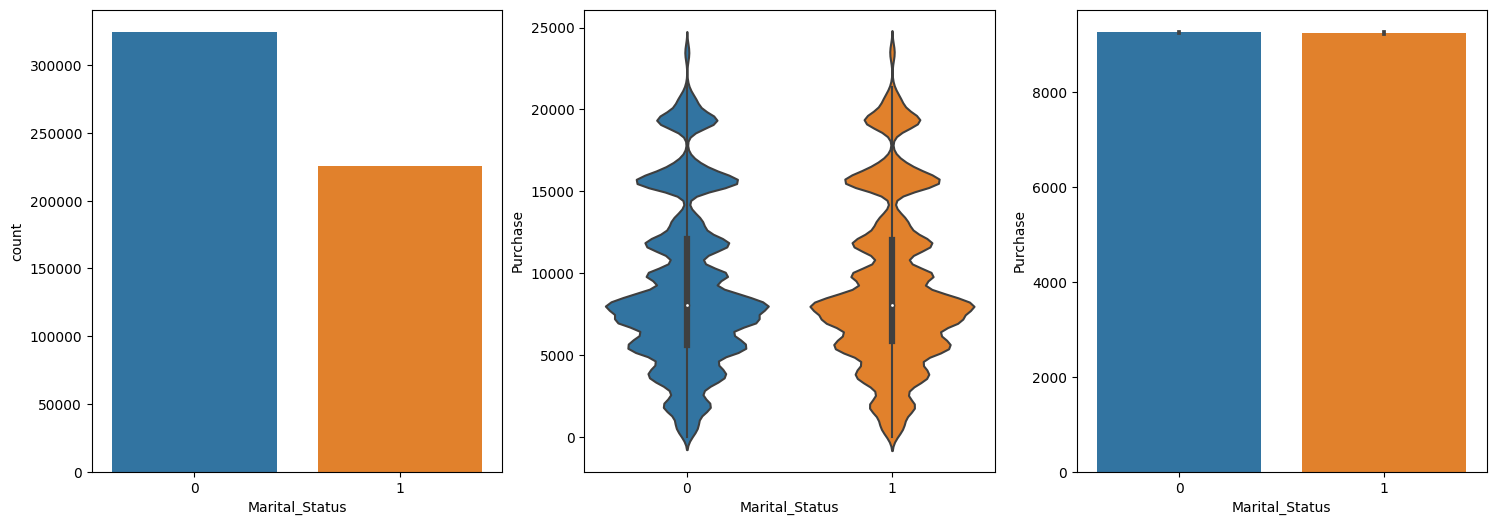

In [ ]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.countplot(data=data,x="Marital_Status")
plt.subplot(1,3,2)
sns.violinplot(data=data,y="Purchase",x = "Marital_Status")
plt.subplot(1,3,3)
sns.barplot(data=data,y="Purchase",x = "Marital_Status", estimator = "mean")
plt.show

* 60% Purchase made by Singles
* Average purchase values is almost same for both Singles & Married

## City_Category

In [5]:
data["City_Category"].value_counts(normalize = True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

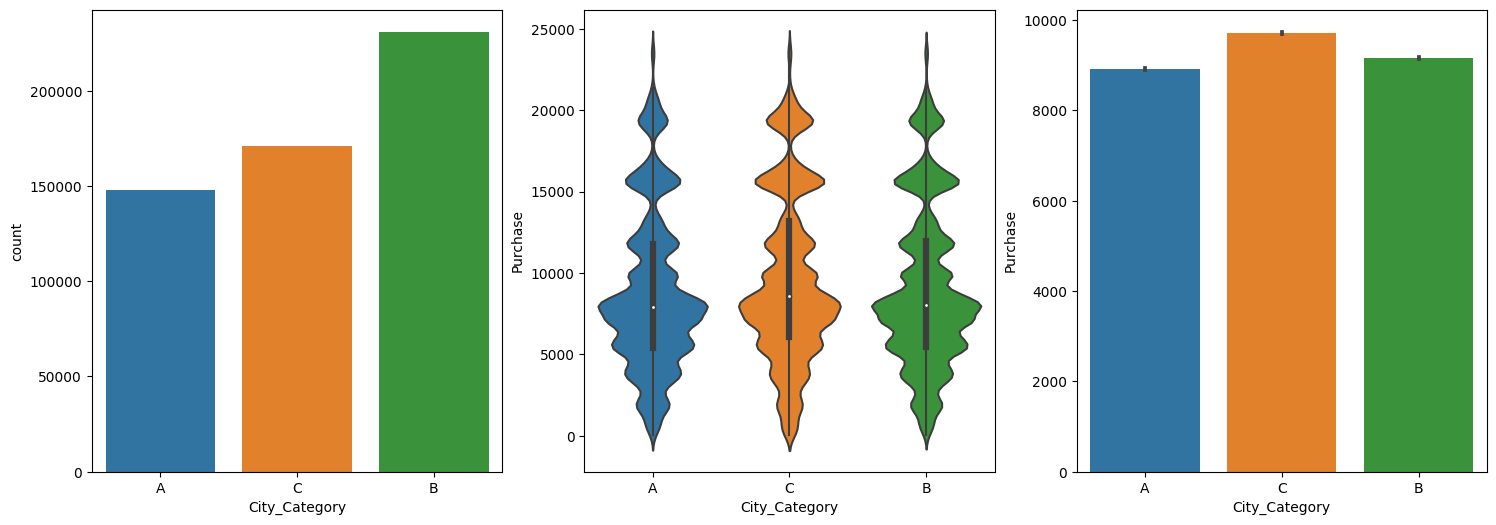

In [6]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.countplot(data=data,x="City_Category")
plt.subplot(1,3,2)
sns.violinplot(data=data,y="Purchase",x = "City_Category")
plt.subplot(1,3,3)
sns.barplot(data=data,y="Purchase",x = "City_Category", estimator = "mean")
plt.show

* Purchase Value Proportion is almost same in all Cities Customers
* However Most Purchases are made by "B" City Customers
* But Mean Purchase Value is Highest for "C" City Customers

## Stay_In_Current_City_Years

In [8]:
data["Stay_In_Current_City_Years"].value_counts(normalize = True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

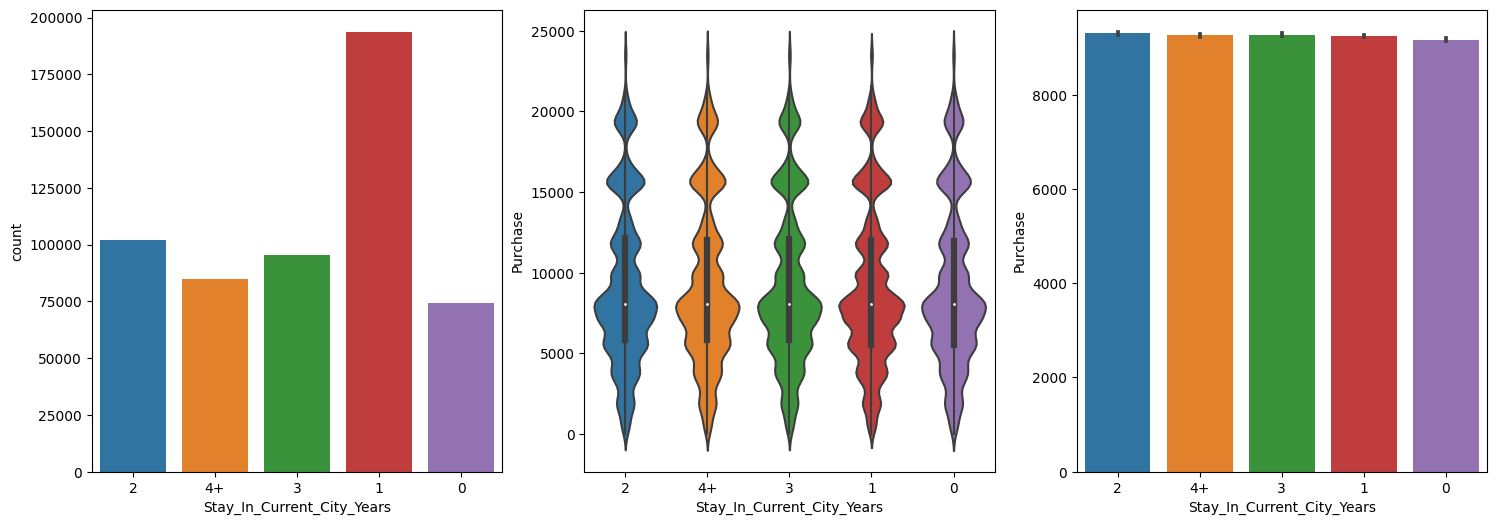

In [7]:
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.countplot(data=data,x="Stay_In_Current_City_Years")
plt.subplot(1,3,2)
sns.violinplot(data=data,y="Purchase",x = "Stay_In_Current_City_Years")
plt.subplot(1,3,3)
sns.barplot(data=data,y="Purchase",x = "Stay_In_Current_City_Years", estimator = "mean")
plt.show

* Purchase Value Proportion is almost same with respect to Stay in Current City Years
* However Most Purchases are made by Customers who stayed for "1" year
* Mean Purchase Value is almost same with respect to Stay in Current City Years


# **Confidence Interval of Mean Purchase Values**

In [ ]:
# Finding outlier for Purchase values for each feature and its values
x ="Purchase"
for z in ['Gender', 'Age', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']:
  for y in data[z].value_counts().index:
    outlierlist=[]
    datai = data[data[z] == y]
    print(z,"-", y,"Category")
    print("*******************************************************************")
    IQR = np.percentile(datai[x],75) - np.percentile(datai[x],25)
    lower_limit = max (np.percentile(datai[x],25) - 1.5*IQR,0)
    upper_limit = np.percentile(datai[x],75) + 1.5*IQR
    outlierlist.extend(list(np.where( (datai[x]>upper_limit) | (datai[x]<lower_limit) )[0]))


In [12]:
x ="Purchase"
outlierlist=[]
datai = data[data["Gender"] == "M"]
IQR = np.percentile(datai[x],75) - np.percentile(datai[x],25)
lower_limit = max (np.percentile(datai[x],25) - 1.5*IQR,0)
upper_limit = np.percentile(datai[x],75) + 1.5*IQR
outlierlist.extend(list(np.where( (datai[x]>upper_limit) | (datai[x]<lower_limit) )[0]))
print(datai.shape)
print(outlierlist)

(414259, 10)
[259, 453, 1074, 1460, 2470, 2471, 2476, 2637, 3034, 3218, 3907, 3908, 4249, 4250, 4308, 4533, 4575, 5040, 5067, 5093, 5308, 5380, 5508, 5564, 5703, 5800, 6018, 6091, 6400, 6713, 6959, 7652, 7764, 7869, 8241, 8608, 8735, 9218, 9615, 10022, 10104, 12006, 12319, 12361, 12434, 12545, 12546, 12618, 13163, 13171, 13185, 13227, 13389, 13491, 13492, 13575, 13653, 13776, 13963, 14471, 14716, 14865, 15285, 15331, 15786, 16324, 16676, 16893, 16895, 17007, 17402, 17528, 17623, 17718, 18817, 18972, 19325, 19391, 19543, 20043, 20587, 20972, 21073, 22392, 22454, 22478, 22561, 22606, 23033, 23341, 23369, 23596, 23747, 23948, 24073, 24565, 24844, 24906, 25009, 25087, 25109, 25277, 25525, 25886, 26335, 26537, 26659, 26674, 26717, 26803, 26905, 27095, 27199, 27347, 27972, 28319, 28604, 28984, 29104, 29144, 29338, 29505, 29599, 29882, 29913, 30289, 30341, 30703, 30790, 31002, 31191, 31383, 31665, 32078, 32152, 32154, 32311, 32399, 32668, 33034, 33793, 34111, 34395, 34396, 34602, 34838, 34849

In [15]:
datai = datai.reset_index()
datai.drop(outlierlist,inplace=True)

In [17]:
datai.shape[0]+len(outlierlist)

414259

In [66]:
sample_mean_50 = [np.mean(datai["Purchase"].sample(100)) for i in range(5000)]

In [67]:
Mean_of_sample_Mean = np.mean(sample_mean_50)

In [68]:
print(Mean_of_sample_Mean)

9370.334294


In [ ]:
sns.displot(sample_mean_50,kde=True)

In [69]:
np.std(sample_mean_50)

500.2803259901608

In [24]:
def confiinterval(mu, sigma, n, perct):
  # Sigma is the Population standard Deviation
  # mu is Population or Sample Mean
  # n is sample Size
  # perct is confidence percentatge required for interval calculation
  std_error = sigma / np.sqrt(n)
  x1 = mu + (std_error * norm.ppf((100-perct)/200))
  x2 = mu + (std_error * norm.ppf(1 - ((100-perct)/200)))
  return x1,x2

In [70]:
confiinterval(Mean_of_sample_Mean,np.std(sample_mean_50), 100 , 90)

(9288.045503130263, 9452.623084869738)


* 50 - 20000 : (9207.67145752276, 9537.28045447724)
* 50 - 5000 : (9213.955705883935, 9544.597150116064)
* 40 - 5000 : (9153.267825641731, 9564.583414358269)
* 30 - 5000 : (9098.685695112474, 9640.825171554194)
* 100 - 5000 : (9288.045503130263, 9452.623084869738)

In [71]:
# Code for Finding Confidence Interval from given sample data using CLT
# data = sample Dataset, series Datatype
# n = Sample size for mean calculation >=30
# m = No of Sample mean for Distribution
# perct = Confidence interval Percentage
def Confidence_Interval(data,n,m,perct):
   sample_mean_n = [np.mean(datai["Purchase"].sample(n)) for i in range(m)]
   Mean_of_sample_Mean = np.mean(sample_mean_n)
   sd_of_sample = data.std()

   print("Mean Value is:",Mean_of_sample_Mean)

   std_error = sd_of_sample / np.sqrt(n)
   x1 = Mean_of_sample_Mean + (std_error * norm.ppf((100-perct)/200))
   x2 = Mean_of_sample_Mean + (std_error * norm.ppf(1 - ((100-perct)/200)))
   return x1,x2


In [76]:
print(Confidence_Interval(datai["Purchase"],50,5000,90))

Mean Value is: 9389.504687999999
(8222.378457218443, 10556.630918781555)


# **Bussiness Insights**

# **Recommendations**